In [5]:
#paket
!pip install pmdarima

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [3]:
# Load dataset bawaan statsmodels (misalnya data makroekonomi AS)
data = sm.datasets.macrodata.load_pandas().data

In [5]:
# Konversi tahun ke datetime format
data['year'] = data['year'].astype(int)
data['quarter'] = data['quarter'].astype(int)
data['date'] = pd.to_datetime(data['year'].astype(str) + '-' + (data['quarter']*3).astype(str) + '-01')
data.set_index('date', inplace=True)

In [7]:
# Pilih variabel yang akan diprediksi, misalnya PDB (real GDP)
y = data['realgdp']

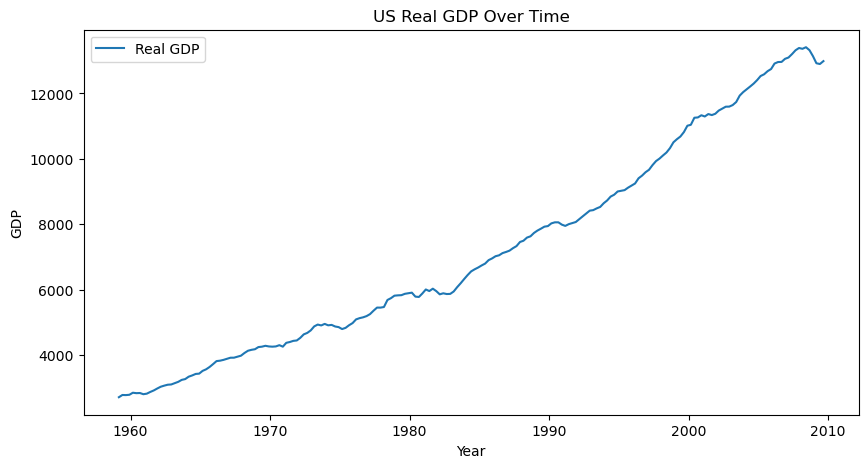

In [9]:
# Plot data
plt.figure(figsize=(10,5))
plt.plot(y, label="Real GDP")
plt.title("US Real GDP Over Time")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()
plt.show()

In [11]:
# Uji stasioneritas dengan ADF Test
adf_test = adfuller(y)
print(f"ADF Statistic: {adf_test[0]}")
print(f"P-Value: {adf_test[1]}")

ADF Statistic: 1.7504627967647102
P-Value: 0.9982455372335032


In [13]:
# Gunakan auto_arima untuk mencari model terbaik
model = auto_arima(y, seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2252.986, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=2215.326, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=2198.399, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2250.987, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=2196.556, Time=0.20 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=2202.249, Time=0.53 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=2194.624, Time=0.16 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2196.453, Time=0.10 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2200.302, Time=0.32 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=2185.834, Time=0.28 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=2186.249, T

In [15]:
# Buat model ARIMA dengan parameter terbaik
from statsmodels.tsa.arima.model import ARIMA

In [17]:
best_order = model.order
print(f"Best ARIMA Order: {best_order}")

Best ARIMA Order: (0, 2, 3)


In [19]:
# Fit model ARIMA
arima_model = ARIMA(y, order=best_order).fit()
print(arima_model.summary())

C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                realgdp   No. Observations:                  203
Model:                 ARIMA(0, 2, 3)   Log Likelihood               -1088.917
Date:                Mon, 03 Mar 2025   AIC                           2185.834
Time:                        10:43:32   BIC                           2199.047
Sample:                    03-01-1959   HQIC                          2191.181
                         - 09-01-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6413      0.050    -12.746      0.000      -0.740      -0.543
ma.L2         -0.0746      0.064     -1.173      0.241      -0.199       0.050
ma.L3         -0.2353      0.053     -4.478      0.0

In [21]:
# Peramalan untuk 10 periode ke depan
forecast_steps = 10
forecast = arima_model.forecast(steps=forecast_steps)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5712\1425464029.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  plt.plot(pd.date_range(y.index[-1], periods=forecast_steps+1, freq='Q')[1:], forecast, label="Forecast", linestyle="dashed")


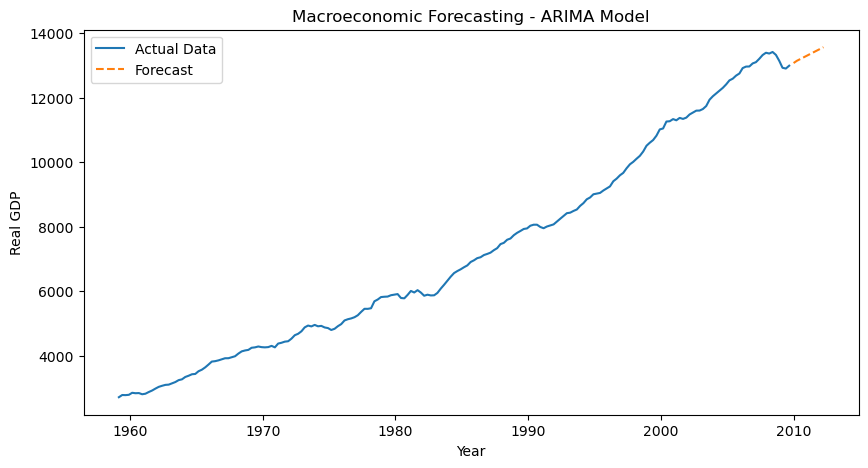

In [23]:
# Plot hasil peramalan
plt.figure(figsize=(10,5))
plt.plot(y, label="Actual Data")
plt.plot(pd.date_range(y.index[-1], periods=forecast_steps+1, freq='Q')[1:], forecast, label="Forecast", linestyle="dashed")
plt.title("Macroeconomic Forecasting - ARIMA Model")
plt.xlabel("Year")
plt.ylabel("Real GDP")
plt.legend()
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_5712\4244159845.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  plt.plot(pd.date_range(y.index[-1], periods=forecast_steps+1, freq='Q')[1:], forecast, label="Forecast", linestyle="dashed")


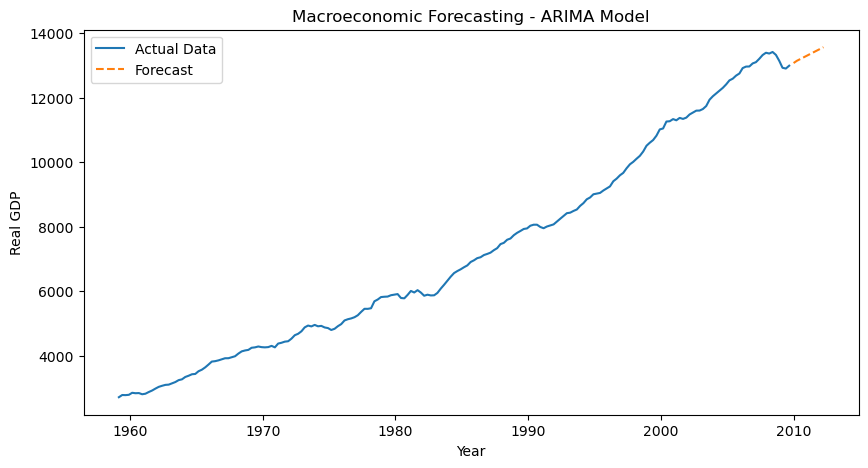

In [29]:
# Simpan hasil plot sebagai file PNG
plt.figure(figsize=(10,5))
plt.plot(y, label="Actual Data")
plt.plot(pd.date_range(y.index[-1], periods=forecast_steps+1, freq='Q')[1:], forecast, label="Forecast", linestyle="dashed")
plt.title("Macroeconomic Forecasting - ARIMA Model")
plt.xlabel("Year")
plt.ylabel("Real GDP")
plt.legend()

# Simpan sebelum menampilkan
plt.savefig("forecast_plot.png", dpi=300, bbox_inches='tight')
plt.show()

In [31]:
import shutil
from IPython.display import FileLink

# Pindahkan file ke folder aksesible untuk download (opsional)
shutil.move("forecast_plot.png", "./forecast_plot.png")

# Tampilkan link untuk download di Jupyter Notebook
FileLink("forecast_plot.png")

C:\Users\ACER\forecast_plot.png

In [33]:
from IPython.display import FileLink

# Menampilkan link untuk download di Jupyter
FileLink("forecast_plot.png")

C:\Users\ACER\forecast_plot.png